# Laboratory 2 Details

Author: Terence Yu

Course and Section: AIDI-1002-01

Dataset Source: https://www.kaggle.com/tejashvi14/engineering-placements-prediction

# Business Problem Description

The college engineering department has experienced a tremendous increase in interest which resulted to record student enrolment over the last few years. With the increase of students in engineering programs follows an increase in the number of students applying for placement programs. This has led to the college staff processing and reviewing applications to be overworked and unable to keep up with the applications that are coming in. The task involves creating an AI algorithm which will perform the review of applicants to determine if they are likely to succeed in getting a placement position or not.

# Solution

## Load the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [2]:
dataset = pd.read_csv('collegePlace.csv')

## Exploratory Data Analysis

### Data Analysis

In [3]:
dataset.shape

(2966, 8)

Above shows that the dataset contains almost 3,000 records with 8 colums

In [4]:
dataset.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')


Independent Variables

* Age - the age of the applicant in the final year

* Gender - the gender of the applicant

* Stream - the program / stream the applicant is pursuing

* Internships - the number of internships undertaken during the course of studies

* CGPA - Cummulative GPA

* Hostel - whether or not the applicant lives in college accommodation

* HistoryOfBacklogs - whether or not the student had any backlogs in any subjects



Dependent Variable
* PlacedOrNot - whether or not the applicant is successful in getting a placement

In [5]:
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


Above shows sample data of the dataset for initial analysis. Result shows that most columns are numerical except for Gender and Stream independent variables.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


From the number of non-null values for each column, it is determined that all columns are populated and there are no nulls that could affect the data processing.

In [7]:
# Convert Gender and Stream to Category data type
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Stream'] = dataset['Stream'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                2966 non-null   int64   
 1   Gender             2966 non-null   category
 2   Stream             2966 non-null   category
 3   Internships        2966 non-null   int64   
 4   CGPA               2966 non-null   int64   
 5   Hostel             2966 non-null   int64   
 6   HistoryOfBacklogs  2966 non-null   int64   
 7   PlacedOrNot        2966 non-null   int64   
dtypes: category(2), int64(6)
memory usage: 145.3 KB


Above changes the data type for the two string columns into categories in order to be able to identify unique values.

In [8]:
dataset.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


Show statistical information about the contents of each column.

In [9]:
dataset.nunique()

Age                  11
Gender                2
Stream                6
Internships           4
CGPA                  5
Hostel                2
HistoryOfBacklogs     2
PlacedOrNot           2
dtype: int64

Above indicates that there are two (2) unique values for the Gender column and six (6) uniqe values for the Stream column.

In [10]:
dataset['Gender'].cat.categories

Index(['Female', 'Male'], dtype='object')

The unique values for Gender are: "Female" and "Male"

In [11]:
dataset['Stream'].cat.categories

Index(['Civil', 'Computer Science', 'Electrical',
       'Electronics And Communication', 'Information Technology',
       'Mechanical'],
      dtype='object')

The unique values for Stream are: 'Civil', 'Computer Science', 'Electrical', 'Electronics And Communication', 'Information Technology', and 'Mechanical'

### Plot Analysis

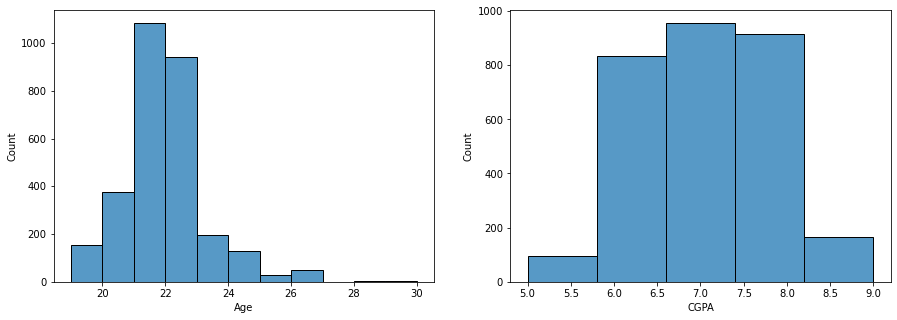

In [12]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
sns.histplot(dataset['Age'],bins=11)

plt.subplot(122)
sns.histplot(dataset['CGPA'],bins=5)

plt.show()

Above plots show that majority of participants are aged 21 and 22 and CGPA follows a normal curve.

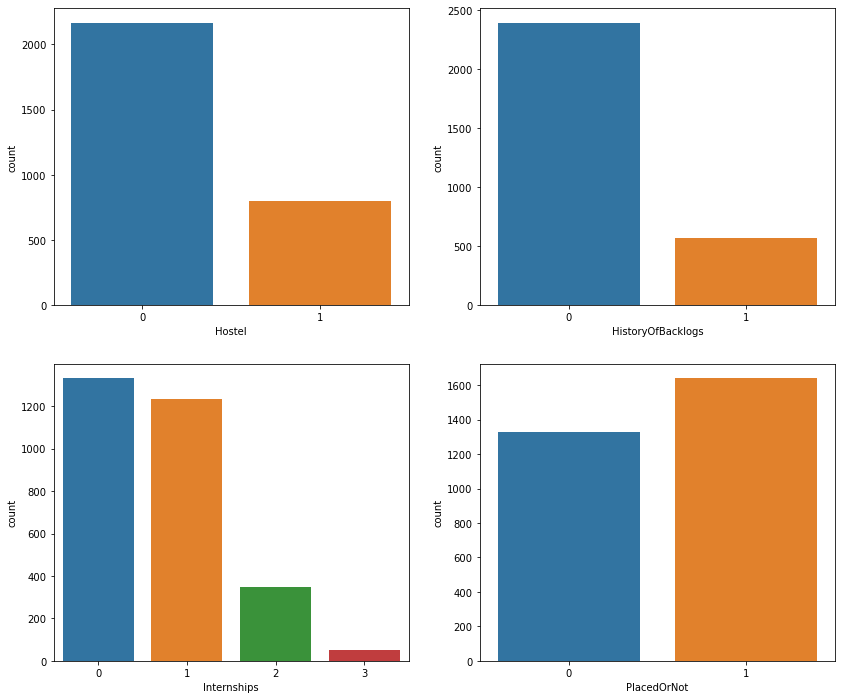

In [13]:
plt.subplots(2,2,figsize=(14,12))

plt.subplot(221)
sns.countplot(data=dataset, x='Hostel')

plt.subplot(222)
sns.countplot(data=dataset, x='HistoryOfBacklogs')

plt.subplot(223)
sns.countplot(data=dataset, x='Internships')

plt.subplot(224)
sns.countplot(data=dataset, x='PlacedOrNot')
plt.show()

Above plots show that majority of participants do not live on campus and do not have a history of backlogs. Majority of participants also had either 0 or 1 internships. The result is that there are slightly more participants that were able to be placed.

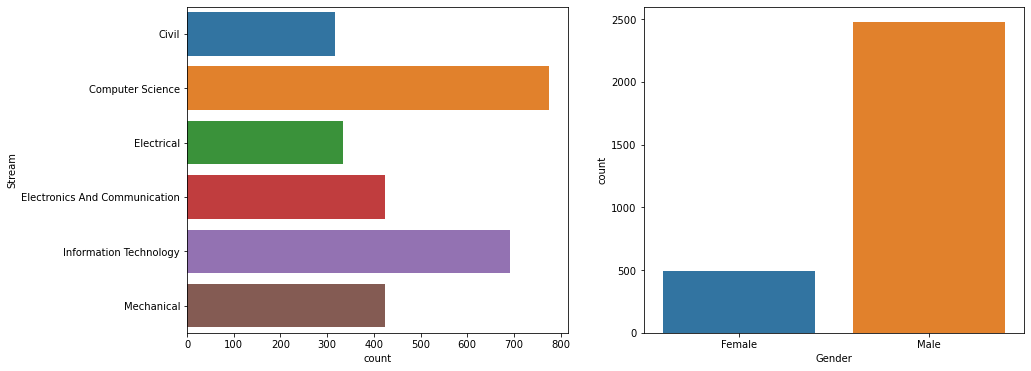

In [14]:
plt.subplots(1,2,figsize=(15,6))

plt.subplot(121)
sns.countplot(data=dataset, y='Stream')

plt.subplot(122)
sns.countplot(data=dataset, x='Gender')

plt.show()

Above plots show that majority of participants are from Computer Science and Information Technology streams and males nearly outnumber females 5 to 1.

## Feature Engineering

Since the implementation for Decision Tree Classifier by Scikit Learn 
has a bug related to categorical data, category data must first be converted
to numerical data. One hot encoding is used to convert to numerical data to
avoid potential misinterpretation of the algorithm that the numerical values
are ordinal and can be compared against each other.

### One Hot Encoding of Gender column

In [15]:
genderValues = ['Male', 'Female']
gendersEncoder = OneHotEncoder(categories=[genderValues], dtype='short')
gendersDF = pd.DataFrame(gendersEncoder.fit_transform(dataset[['Gender']]).toarray())
gendersDF.columns = genderValues
gendersDF.head()

,Male,Female
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


### One Hot Encoding of Stream Column

In [16]:
streamValues = ['Civil', 'Computer Science', 'Electrical',
                 'Electronics And Communication', 'Information Technology',
                 'Mechanical']
streamEncoder = OneHotEncoder(categories=[streamValues], dtype='short')
streamDF = pd.DataFrame(streamEncoder.fit_transform(dataset[['Stream']]).toarray())
streamDF.columns = streamValues
streamDF.head()

,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


### Finalize Dataset and Reorder Columns

In [17]:
dataset = dataset.join(gendersDF).join(streamDF)
# Remove no longer needed columns and reorder such that label is at the end
columnsInOrder = ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
                  'Male', 'Female',
                  'Civil', 'Computer Science', 'Electrical',
                  'Electronics And Communication', 'Information Technology',
                  'Mechanical',
                  'PlacedOrNot']

dataset.columns
dataset = dataset[columnsInOrder]

## ML Classifiers and Datasets

### Segragate Train and Test Data

In [18]:
train, test = train_test_split(dataset, test_size=0.2)

In [19]:
train.shape

(2372, 14)

In [20]:
train.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Male,Female,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,PlacedOrNot
294,21,0,8,0,0,1,0,1,0,0,0,0,0,1
1880,22,0,6,0,0,1,0,0,1,0,0,0,0,0
1829,21,0,7,0,0,1,0,1,0,0,0,0,0,0
1063,22,1,7,0,0,1,0,0,0,0,1,0,0,0
2296,19,2,7,0,1,1,0,0,0,1,0,0,0,1


In [21]:
test.shape

(594, 14)

In [22]:
test.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Male,Female,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,PlacedOrNot
2219,20,0,8,0,1,1,0,0,1,0,0,0,0,1
1532,22,1,6,0,0,1,0,0,1,0,0,0,0,0
1735,24,0,6,0,0,1,0,0,0,0,0,1,0,1
201,22,1,6,0,0,1,0,0,1,0,0,0,0,0
1492,22,1,8,1,0,1,0,0,0,0,0,1,0,1


### Prepare Train Data

In [23]:
# Separate the labels from the data
trainData = train[train.columns[0:-1]]
trainData.shape

(2372, 13)

In [24]:
trainData.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Male,Female,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
294,21,0,8,0,0,1,0,1,0,0,0,0,0
1880,22,0,6,0,0,1,0,0,1,0,0,0,0
1829,21,0,7,0,0,1,0,1,0,0,0,0,0
1063,22,1,7,0,0,1,0,0,0,0,1,0,0
2296,19,2,7,0,1,1,0,0,0,1,0,0,0


In [25]:

trainLabel = train[train.columns[-1:]]
trainLabel.shape

(2372, 1)

In [26]:
trainLabel.head()

,PlacedOrNot
294,1
1880,0
1829,0
1063,0
2296,1


In [27]:
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(trainData, trainLabel)

DecisionTreeClassifier()

### Prepare Test Data

In [28]:
# Separate the labels from the data
testData = test[test.columns[0:-1]]
testData.shape

(594, 13)

In [29]:
testData.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Male,Female,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
2219,20,0,8,0,1,1,0,0,1,0,0,0,0
1532,22,1,6,0,0,1,0,0,1,0,0,0,0
1735,24,0,6,0,0,1,0,0,0,0,0,1,0
201,22,1,6,0,0,1,0,0,1,0,0,0,0
1492,22,1,8,1,0,1,0,0,0,0,0,1,0


In [30]:
testLabel = test[test.columns[-1:]]
testLabel.shape

(594, 1)

In [31]:
testLabel.head()

,PlacedOrNot
2219,1
1532,0
1735,1
201,0
1492,1


### Make Predictions

In [32]:
predictions = treeClassifier.predict(testData)
predictions.shape

(594,)

## Metrics

### Confusion Matrix

In [33]:
metrics.confusion_matrix(testLabel, predictions)

array([[242,  21],
       [ 55, 276]])

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


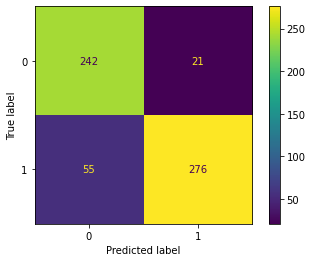

In [34]:
plot_confusion_matrix(treeClassifier,testData,testLabel)
plt.show()

### Accuracy

In [35]:
metrics.accuracy_score(testLabel, predictions)

0.8720538720538721

Accuracy is at 87.2%

### Precision

In [36]:
metrics.precision_score(testLabel, predictions)

0.9292929292929293

Precision is at 92.9%

### Recall

In [37]:
metrics.recall_score(testLabel, predictions)

0.8338368580060423

Recall is at 83.4%

### F1

In [38]:
metrics.f1_score(testLabel, predictions)

0.8789808917197452

F1 score is at 87.9%

### Classification Report

In [39]:
print(metrics.classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       263
           1       0.93      0.83      0.88       331

    accuracy                           0.87       594
   macro avg       0.87      0.88      0.87       594
weighted avg       0.88      0.87      0.87       594

